# print / debug learning rate
# 0.1 and cycle with simplest GPT

In [1]:
import time
import os
start = time.time()

train_epochs=10
learning_rate=0.1
llama_layers=6

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
[2024-05-06 17:07:12,425] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 17:07:13,252] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 17:07:13,252] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 17:07:13,252] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 17:07:14,051] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.164, master_port=29500
[2024-05-06 17:07

# Constant lr

In [2]:
import time
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --lradj 'constant' \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
[2024-05-06 19:06:51,380] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 19:06:52,216] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 19:06:52,216] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 19:06:52,216] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 19:06:53,069] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.164, master_port=29500
[2024-05-06 19:06

In [7]:
lr = 3.9999999999999996e-05
# lr = 0.0000400000
vali_loss = [0.3308652, 0.2944952, 0.2804815, 0.2732254, 0.2882608, 0.2785709, 0.2766443, 0.2857528]
tr_loss = [0.2939578, 0.2525803, 0.2425671, 0.2335046, 0.2254678, 0.2176258, 0.2107309, 0.2050531]

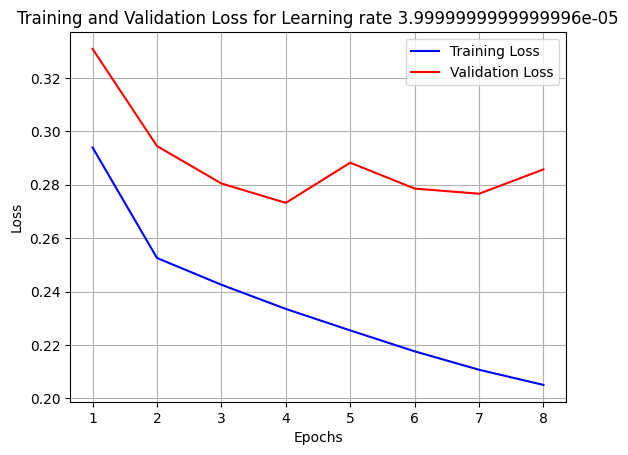

In [9]:
import matplotlib.pyplot as plt

def plot_train_val_loss(train_loss, val_loss, lr=None):
    """
    Plots training and validation loss with optional learning rate values.
    
    Args:
    train_loss (list): List containing training loss values for each epoch.
    val_loss (list): List containing validation loss values for each epoch.
    lr_values (list, optional): List containing learning rate values for each epoch.
    
    Returns:
    legend_labels (list): List containing legend labels for the plot.
    """
    epochs = range(1, len(train_loss) + 1)
    legend_labels = []

    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    legend_labels.append('Training Loss')

    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    legend_labels.append('Validation Loss')

    plt.title(f'Training and Validation Loss for Learning rate {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return legend_labels

legend_labels = plot_train_val_loss(tr_loss, vali_loss, lr)

# Constant lr smaller

In [12]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
[2024-05-06 21:43:00,106] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 21:43:01,058] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 21:43:01,059] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 21:43:01,059] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 21:43:02,012] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.164, master_port=29500
[2024-05-06 21:43

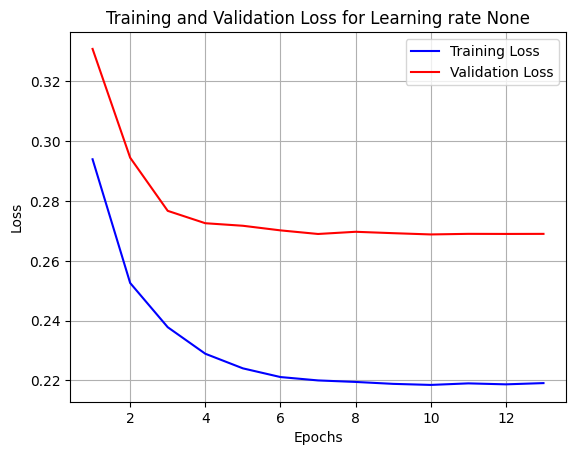

In [13]:
vali_loss = [0.3308652, 0.2944952, 0.2767047, 0.2725649, 0.2717150, 0.2701731, 0.2689678, 0.2697016, 0.2692347, 0.2688137, 0.2690124, 0.2689817, 0.2690037]
tr_loss = [0.2939578, 0.2525803, 0.2377872, 0.2289110, 0.2240235, 0.2211134, 0.2199849, 0.2194789, 0.2188337, 0.2184807, 0.2189967, 0.2186749, 0.2190897]
legend_labels = plot_train_val_loss(tr_loss, vali_loss)